In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import TextParser, TensorDecomposer, Corpus, download

In [4]:
# corpus = Corpus('convokit/tensor_decomposer/experiments/coarse-discourse-subset')
corpus = Corpus('convokit/tensor_decomposer/experiments/reddit-focused-8')

In [5]:
convo = corpus.random_conversation()

In [6]:
convo.print_conversation_structure()

LUClEN
    biznatch11
        EarthVSFlyingSaucers
            Aggressivecleaning
                TheLostLittleCamera
                    tossoneout
                        Saledomo
                            tossoneout
                                Saledomo
                                    tossoneout


In [7]:
[spkr.id for spkr in convo.get_chronological_speaker_list()]

['LUClEN',
 'biznatch11',
 'EarthVSFlyingSaucers',
 'Aggressivecleaning',
 'TheLostLittleCamera',
 'tossoneout',
 'Saledomo',
 'tossoneout',
 'Saledomo',
 'tossoneout']

In [8]:
def chrono_speakers_to_numeric(spkrs):
    d = dict()
    ctr = 0
    for spkr in spkrs:
        if spkr.id not in d:
            d[spkr.id] = ctr
            ctr += 1
    return [d[spkr.id] for spkr in spkrs]

In [9]:
def speaker_numeric_to_matrix(numeric_seq, shape=8):
    retval = []
    for num in numeric_seq:
        d = {idx: 0 for idx in range(shape)}
        d[num] = 1
        retval.append(d)
    return retval

In [10]:
speaker_numeric_to_matrix(chrono_speakers_to_numeric(convo.get_chronological_speaker_list()))

[{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0}]

In [11]:
for convo in corpus.iter_conversations():
    if convo.meta['longest_path'] >= 8:
        spkrs = convo.get_chronological_speaker_list()[:8]
        dicts = speaker_numeric_to_matrix(chrono_speakers_to_numeric(spkrs), 8)
        for idx, d in enumerate(dicts):
            convo.meta['speaker-dict-{}'.format(idx+1)] = d

In [15]:
td = TensorDecomposer(feature_set=['speaker-dict-{}'.format(idx) for idx in range(1, 8+1)], 
                      obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=50)

In [16]:
td.fit(corpus, selector=lambda convo: convo.meta['longest_path'] >= 8)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.8166386379564345, improvement inf.
NCP_BCD: iteration 2, objective 0.7041573746406602, improvement 0.11248126331577435.
NCP_BCD: iteration 3, objective 0.6431583480874399, improvement 0.060999026553220315.
NCP_BCD: iteration 4, objective 0.5951155472370836, improvement 0.04804280085035628.
NCP_BCD: iteration 5, objective 0.5469348936811409, improvement 0.0481806535559427.
NCP_BCD: iteration 6, objective 0.49942905182833863, improvement 0.047505841852802266.
NCP_BCD: iteration 7, objective 0.46070311476073195, improvement 0.038725937067606686.
NCP_BCD: iteration 8, objective 0.4315835575961046, improvement 0.02911955716462733.
NCP_BCD: iteration 9, objective 0.40401324880167194, improvement 0.027570308794432674.
NCP_BCD: iteration 10, objective 0.3772824565848805, improvement 0.02673079221679142.
NCP_BCD: iteration 11, objective 0.35871063418452775, improvement 0.018571822400352767.
NCP_BCD: iteration 12,

NCP_BCD: iteration 94, objective 0.06721905704632448, improvement 9.993225457773092e-05.
NCP_BCD: iteration 95, objective 0.06712090650483918, improvement 9.815054148530622e-05.
NCP_BCD: iteration 96, objective 0.0670236024149869, improvement 9.730408985228478e-05.
NCP_BCD: iteration 97, objective 0.06692743659944526, improvement 9.616581554162951e-05.
NCP_BCD: iteration 98, objective 0.06683274514136399, improvement 9.469145808127521e-05.
NCP_BCD: iteration 99, objective 0.06673986994821902, improvement 9.287519314496451e-05.
NCP_BCD: iteration 100, objective 0.06664943475840822, improvement 9.043518981080578e-05.
NCP_BCD: iteration 101, objective 0.06656291409972252, improvement 8.652065868569592e-05.
NCP_BCD: iteration 102, objective 0.06648034062646746, improvement 8.257347325506259e-05.
NCP_BCD: iteration 103, objective 0.06640319034564605, improvement 7.715028082140585e-05.
NCP_BCD: iteration 104, objective 0.06633297308612464, improvement 7.021725952141566e-05.
NCP_BCD: iteratio

/Users/calebchiam/Documents/GitHub/Cornell-Conversational-Analysis-Toolkit/convokit/tensor_decomposer/tensorDecomposer.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, d, figsize=(12, 4.5))


Directory already exists. Exiting summarize()


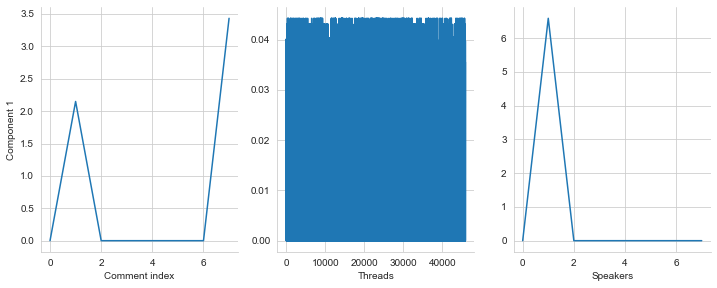

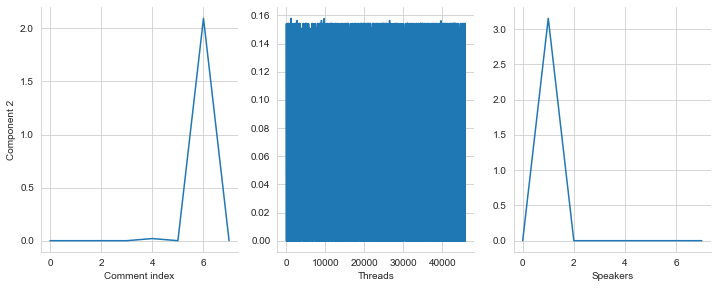

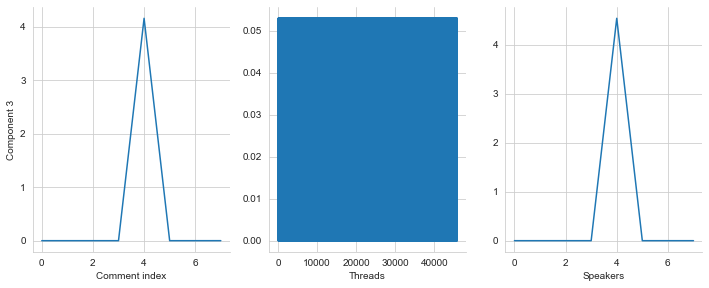

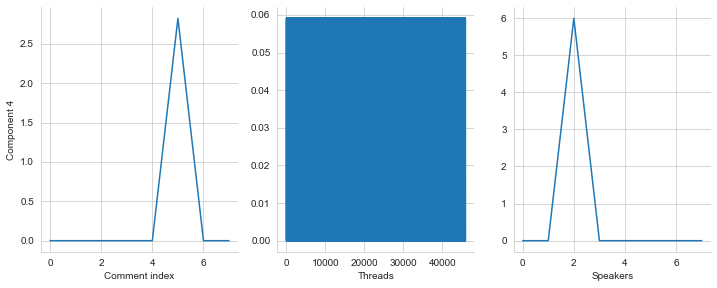

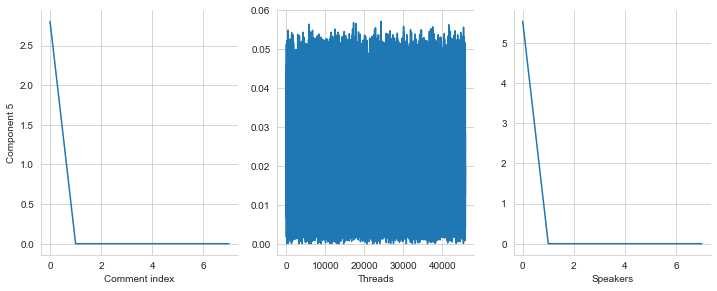

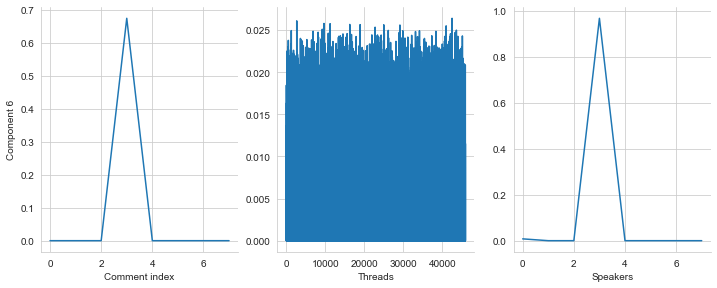

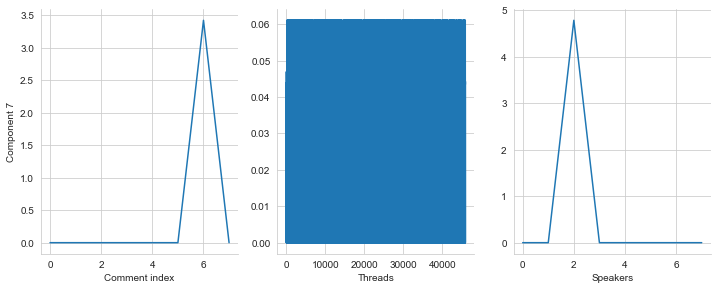

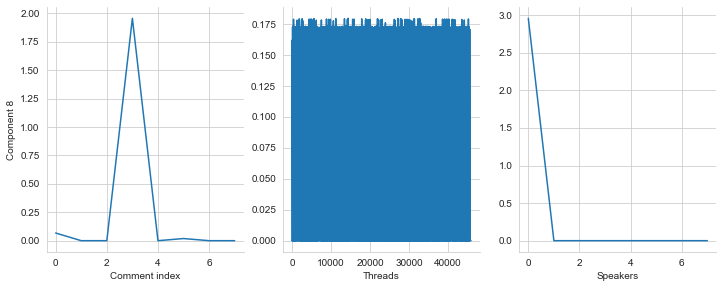

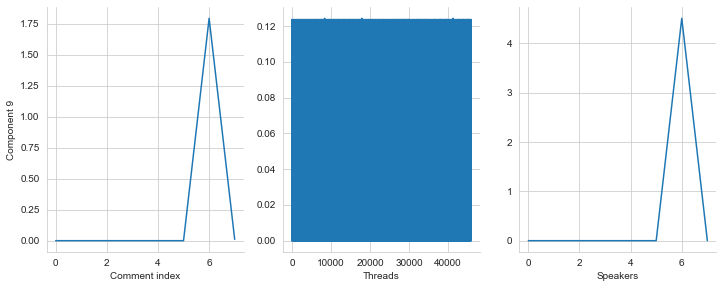

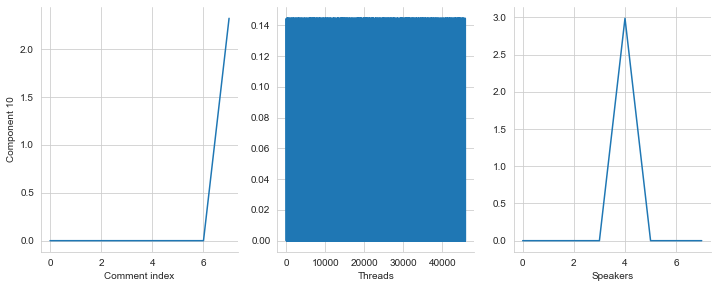

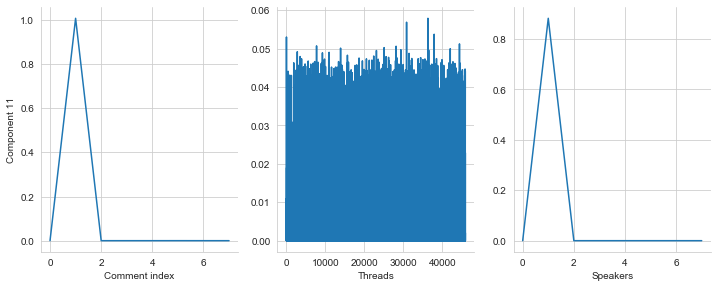

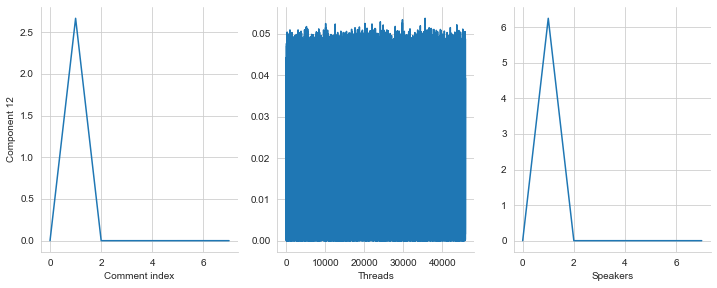

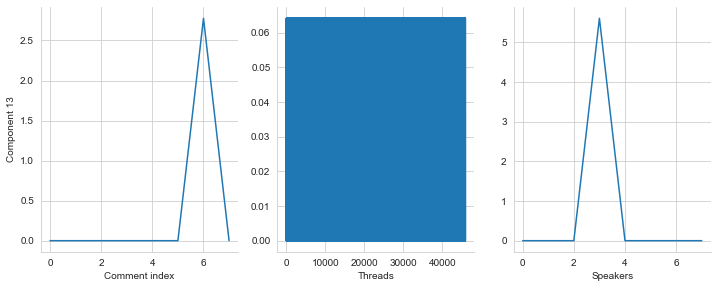

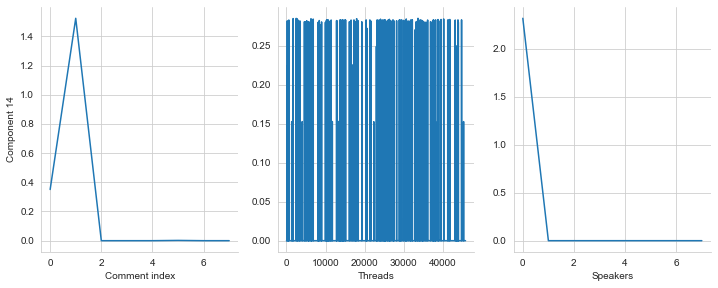

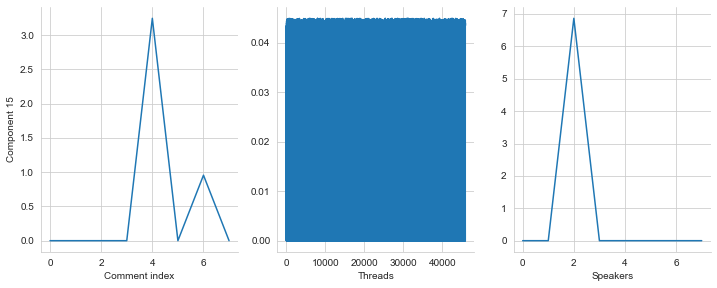

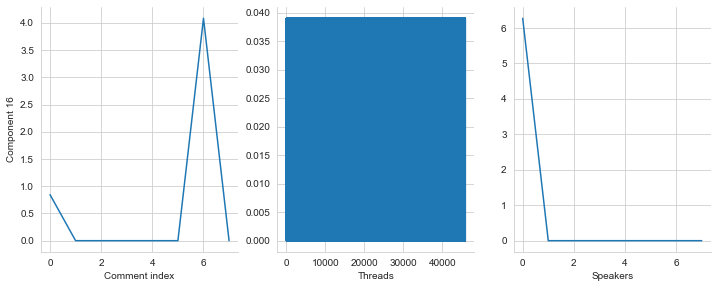

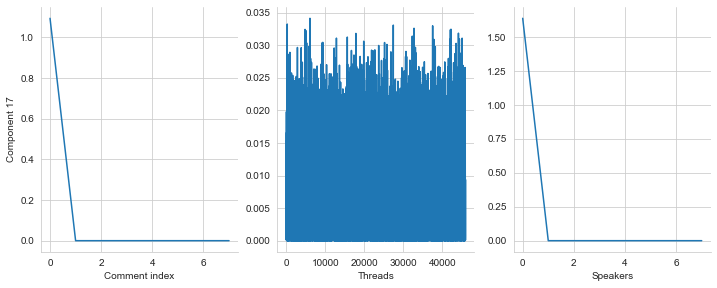

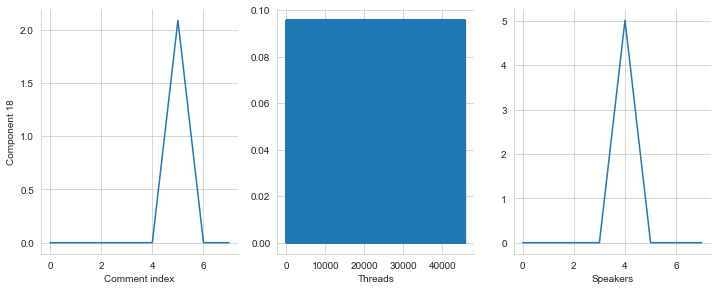

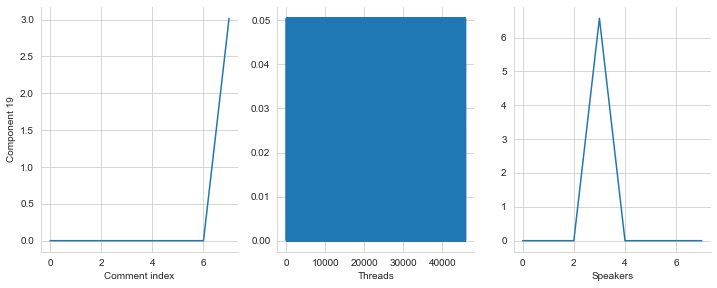

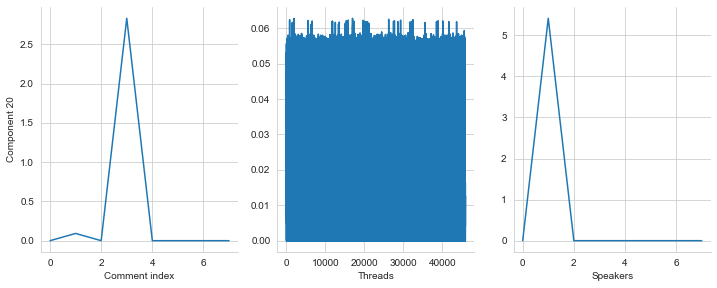

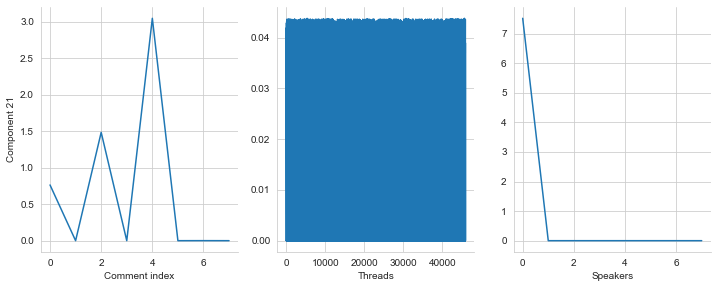

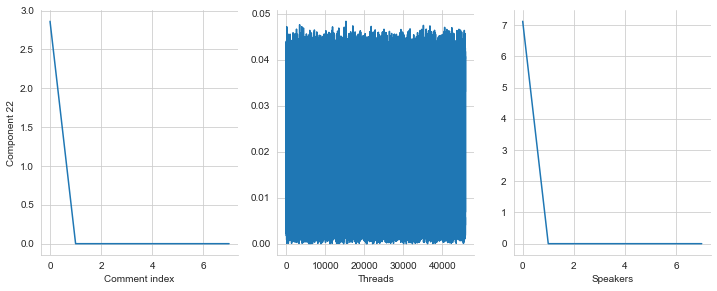

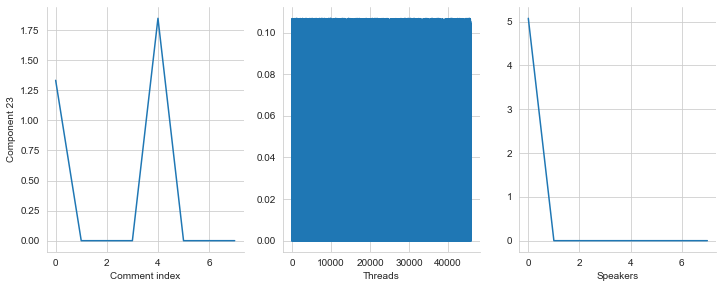

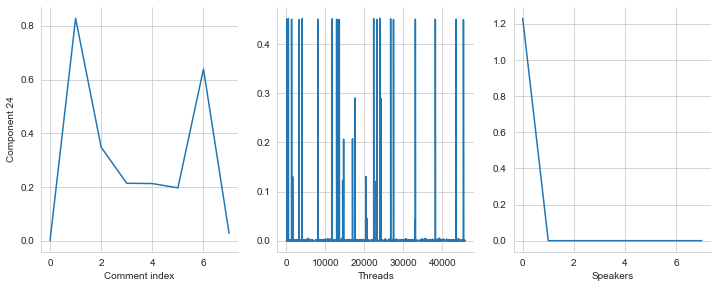

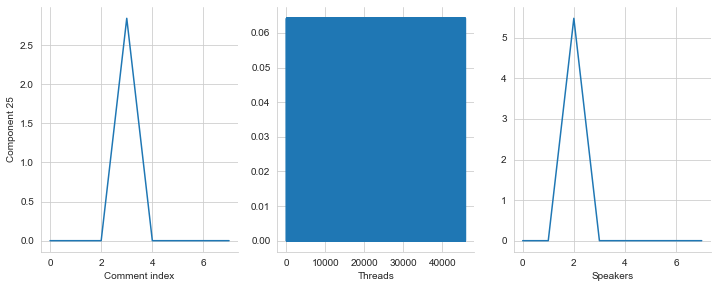

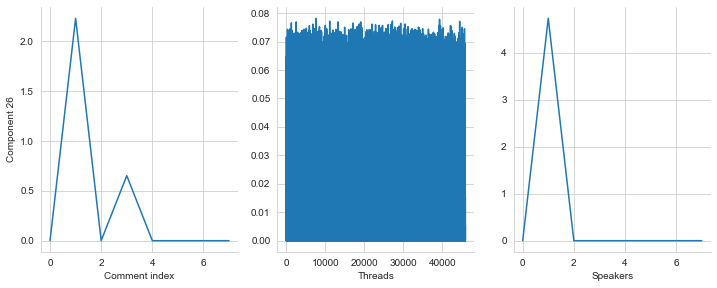

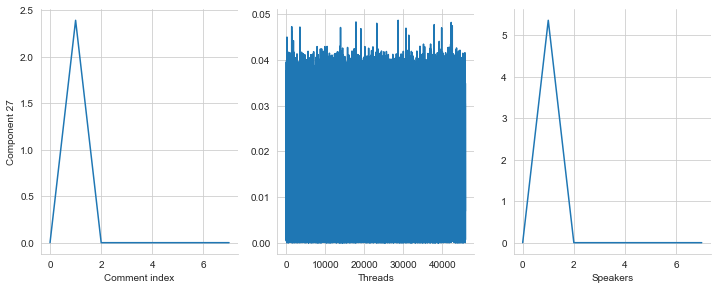

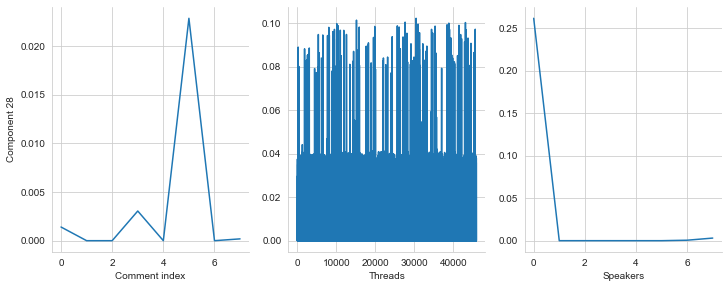

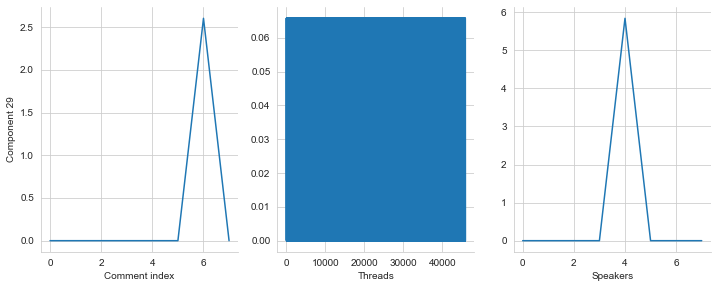

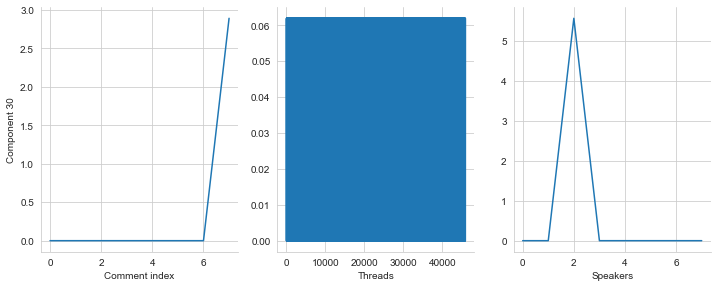

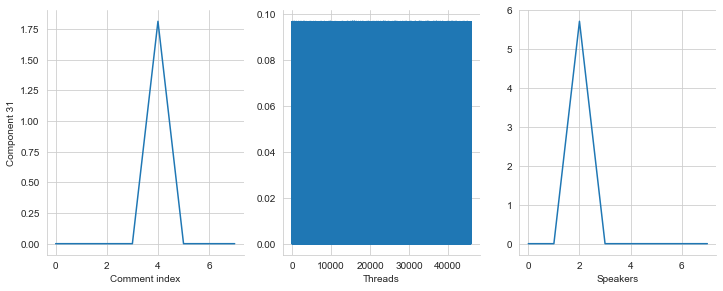

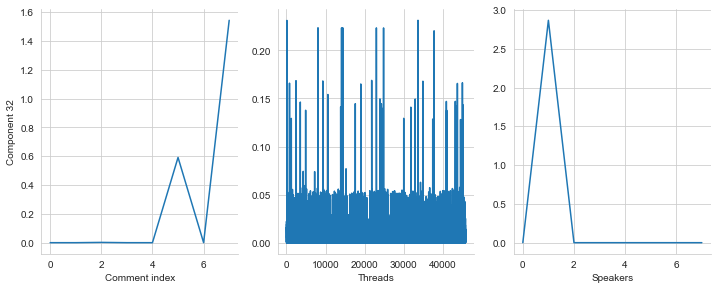

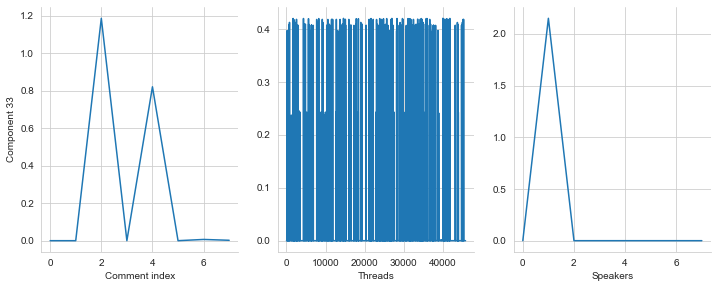

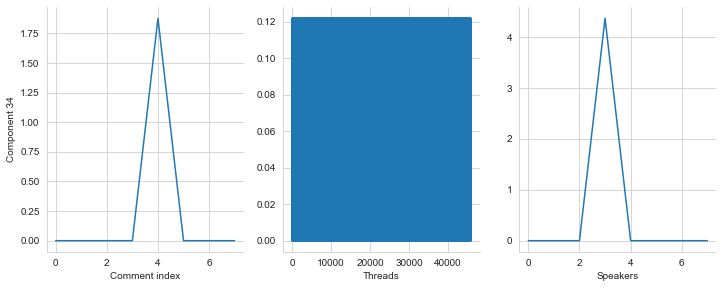

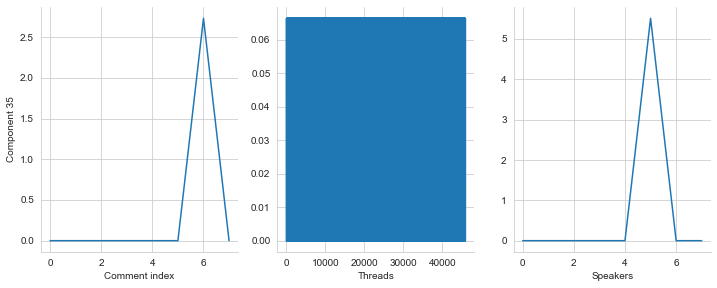

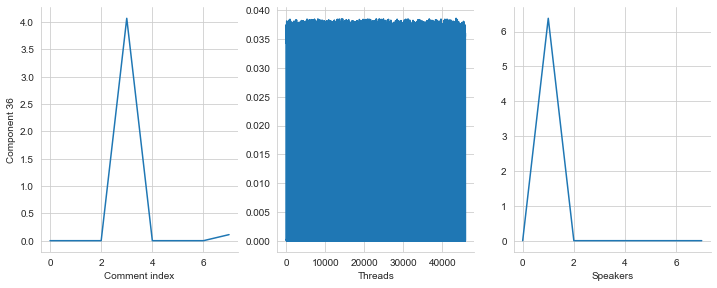

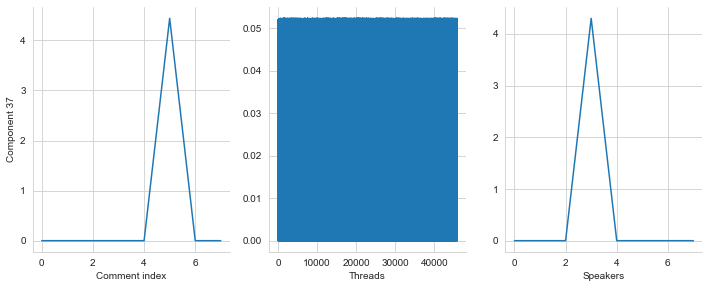

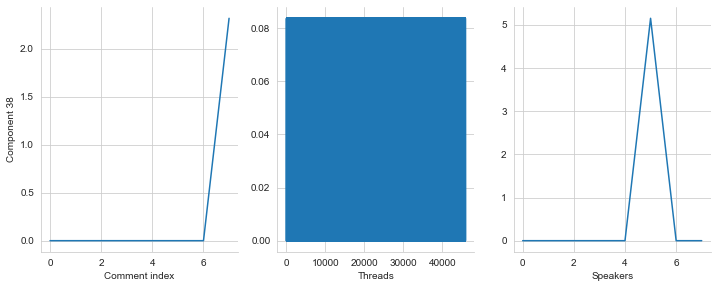

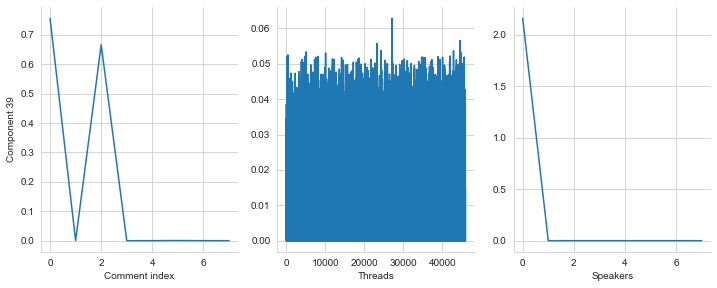

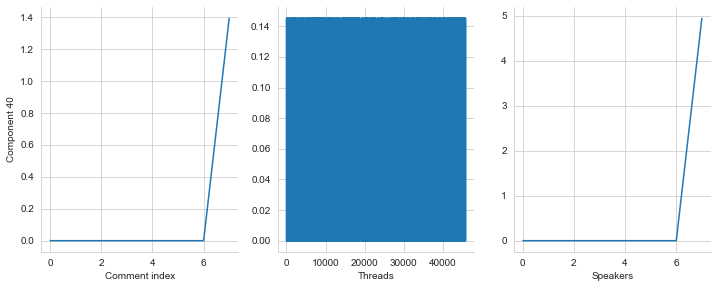

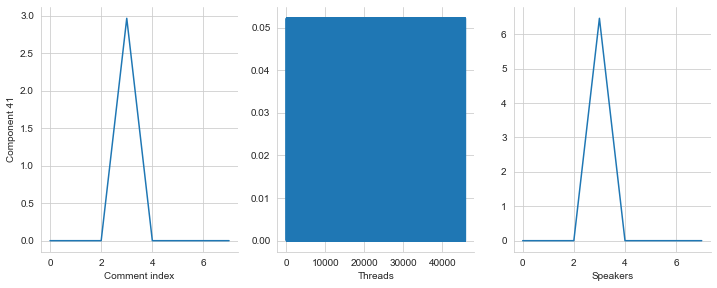

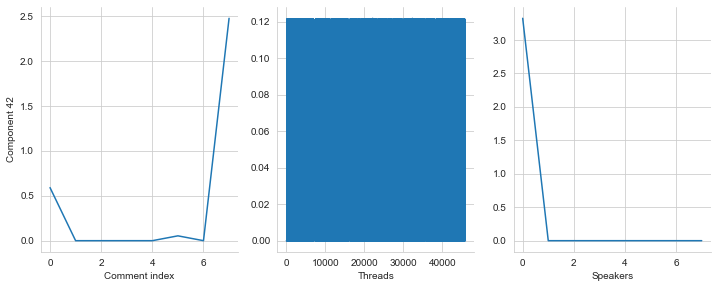

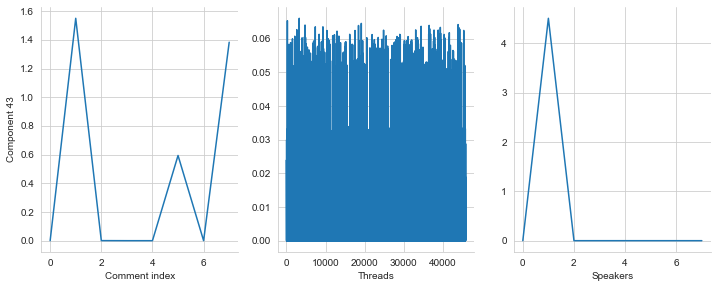

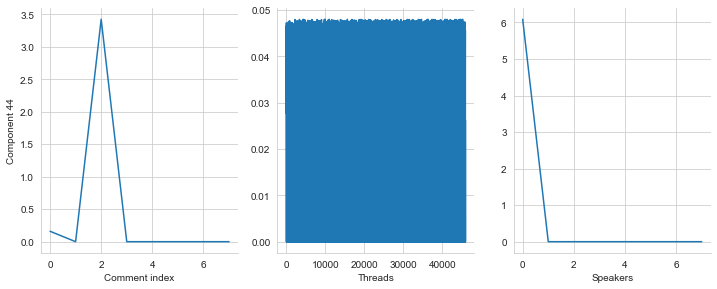

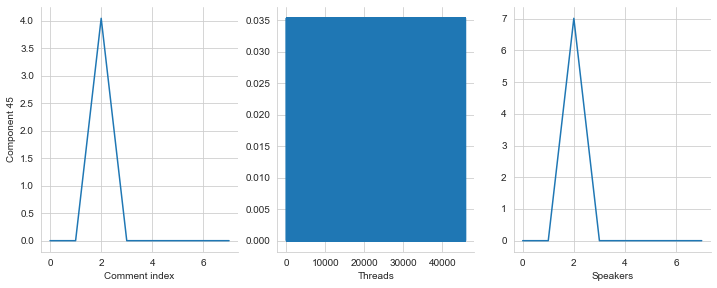

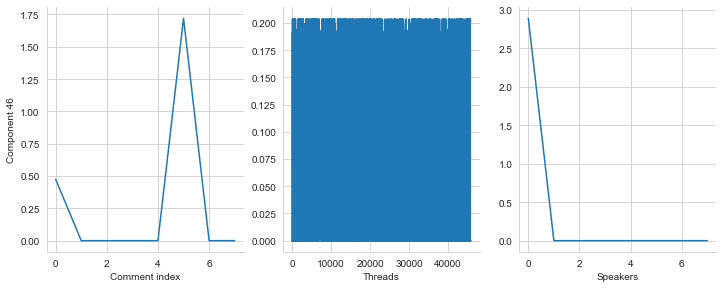

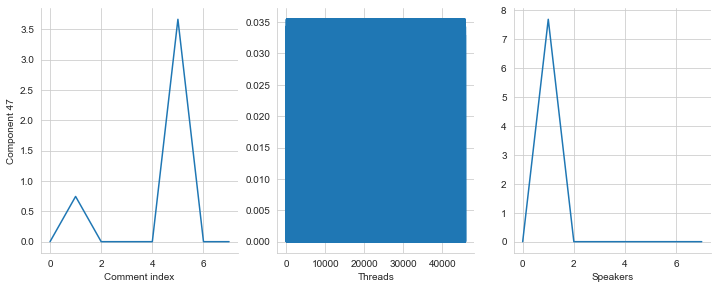

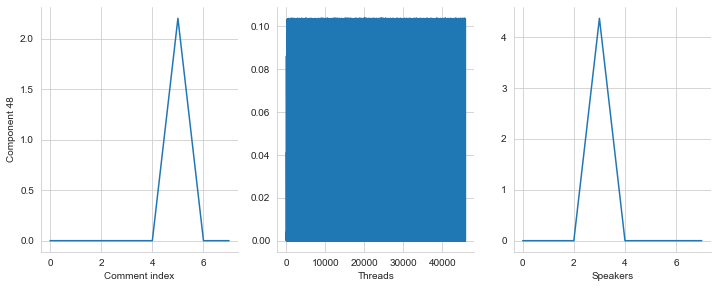

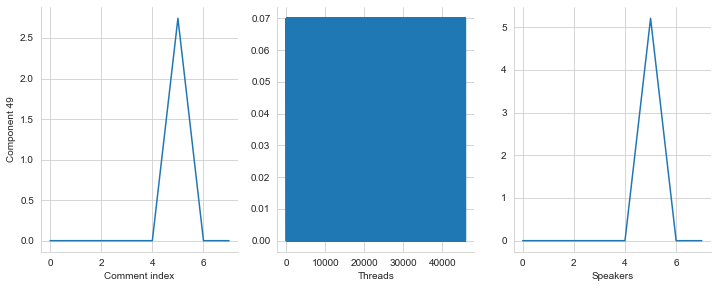

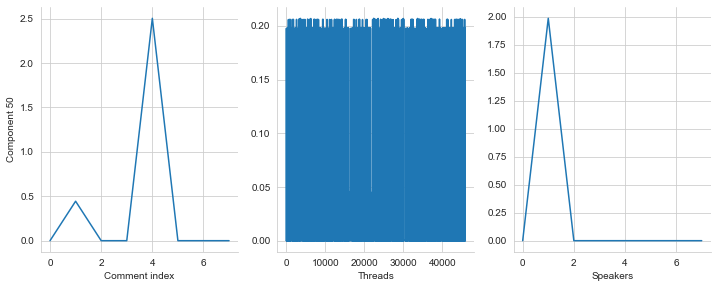

In [17]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'Speakers'], 
             output_dir='convokit/tensor_decomposer/reports/coarse-discourse-speakers', 
             report_title='Coarse discourse speakers', 
             liwc=True)

In [20]:
import seaborn as sns
import numpy as np

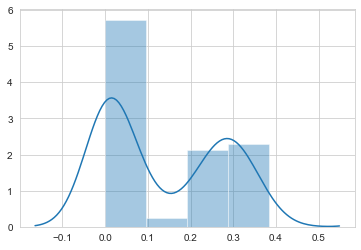

In [17]:
sns.distplot(td_disgmt.factors[1][:, 1])

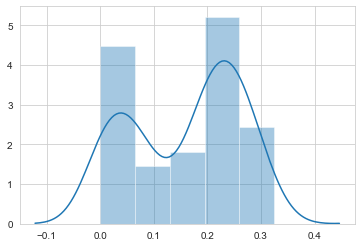

In [18]:
sns.distplot(td_disgmt.factors[1][:, 2])

In [76]:
arr0 = td_disgmt.factors[1][:, 0]
arr1 = td_disgmt.factors[1][:, 1]
arr2 = td_disgmt.factors[1][:, 2]

In [103]:
arr0[27]

0.3604255565872809

In [123]:
start_index = 55
arr0_top = set(list(np.argsort(arr0)[-start_index:]))
arr1_top = set(list(np.argsort(arr1)[-start_index:]))
arr2_top = set(list(np.argsort(arr2)[-start_index:]))

In [131]:
# appears in all three
len(arr0_top & arr1_top & arr2_top)

18

In [125]:
convo_df_subset = corpus.get_conversations_dataframe(selector=lambda convo: convo.meta['longest_path'] >= 8 and 
              convo.get_chronological_utterance_list()[7].meta['disagreement'] == 1)

In [126]:
for idx in (arr0_top & arr1_top & arr2_top):
    convo_id = convo_df_subset.iloc[idx].name
    corpus.get_conversation(convo_id).print_conversation_structure(lambda utt: str(utt.meta['disagreement']), limit=8)

0
    0
        1
            0
                1
                    1
                        1
                            1
0
    0
        1
            1
                1
                    1
                        1
                            1
0
    0
        1
            1
                1
                    1
                        1
                            1
0
    0
        1
            1
                1
                    1
                        1
                            1
0
    0
        0
            1
                1
                    1
                        1
                            1
0
    1
        1
            1
                1
                    1
                        1
                            1
0
    0
        1
            1
                1
                    1
                        1
                            1
0
    1
        0
            1
                1
                    1
                        1
      

In [132]:
len(arr0_top - (arr1_top | arr2_top))

15

In [129]:
for idx in (arr0_top - (arr1_top | arr2_top)):
    convo_id = convo_df_subset.iloc[idx].name
    corpus.get_conversation(convo_id).print_conversation_structure(lambda utt: str(utt.meta['disagreement']), limit=8)

0
    0
        0
            1
                0
                    0
                        1
                            1
0
    0
        1
            1
                1
                    0
                        1
                            1
0
    0
        0
            1
                0
                    0
                        0
                            1
0
    0
        0
            1
                0
                    0
                        0
                            1
0
    0
        1
            1
                0
                    0
                        1
                            1
0
    0
        1
            1
                0
                    0
                        0
                            1
0
    0
        0
            1
                0
                    0
                        0
                            1
0
    0
        1
            1
                0
                    0
                        0
      

In [135]:
len(arr2_top - (arr0_top | arr1_top))

17

In [136]:
for idx in (arr2_top - (arr0_top | arr1_top)):
    convo_id = convo_df_subset.iloc[idx].name
    corpus.get_conversation(convo_id).print_conversation_structure(lambda utt: str(utt.meta['disagreement']), limit=8)

0
    0
        0
            1
                0
                    1
                        1
                            1
0
    0
        1
            0
                0
                    1
                        1
                            1
0
    0
        0
            0
                0
                    1
                        1
                            1
0
    0
        0
            0
                0
                    1
                        1
                            1
0
    0
        1
            0
                0
                    1
                        1
                            1
0
    0
        0
            0
                0
                    1
                        1
                            1
0
    0
        0
            0
                0
                    0
                        1
                            1
0
    0
        0
            0
                0
                    1
                        1
      

In [73]:
len(arr2_top & arr1_top)

22

In [38]:
np.argwhere(arr2 >= np.quantile(td_disgmt.factors[2][:, 1], q=0.66)).flatten()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  17,  18,  21,  22,  23,  24,  25,  26,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  69,  70,
        71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  82,  84,  85,
        86,  88,  89,  90,  91,  92,  93,  94,  95,  97,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126])

### Emphasizing disagreements

In [20]:
corpus.random_utterance()

Utterance({'obj_type': 'utterance', '_owner': <convokit.model.corpus.Corpus object at 0x103f25390>, 'meta': {'post_depth': 3, 'majority_type': None, 'majority_link': 't1_d28jr77', 'annotation-types': ['humor', 'elaboration', 'other'], 'annotation-links': ['t1_d28jr77', 't1_d28jr77', 'none'], 'ups': 2, 'annot-dict': {'agreement': 0, 'announcement': 0, 'answer': 0, 'appreciation': 0, 'disagreement': 0, 'elaboration': 1, 'humor': 1, 'negativereaction': 0, 'other': 1, 'question': 0}, 'agreement': 0, 'announcement': 0, 'answer': 0, 'appreciation': 0, 'disagreement': 0, 'elaboration': 1, 'humor': 1, 'negativereaction': 0, 'other': 1, 'question': 0}, '_id': 't1_d294h9v', 'speaker': Speaker({'obj_type': 'speaker', '_owner': <convokit.model.corpus.Corpus object at 0x103f25390>, 'meta': {}, '_id': 'DSP_GC_98'}), 'conversation_id': 't3_4fg0ul', '_root': 't3_4fg0ul', 'reply_to': 't1_d28jr77', 'timestamp': 0, 'text': 'haha, im from philly so being a smart ass is in my blood. '})

In [26]:
annotation_types = ['agreement',
                     'announcement',
                     'answer',
                     'appreciation',
                     'disagreement',
                     'elaboration',
                     'humor',
                     'negativereaction',
                     'other',
                     'question']

In [29]:
no_maj = 0
no_maj_types = {t: 0 for t in annotation_types}
for utt in corpus.iter_utterances():
    if utt.meta['majority_type'] is None:
        no_maj += 1
        for t in utt.meta['annotation-types']:
            no_maj_types[t] += 1

In [31]:
for t in no_maj_types:
    no_maj_types[t] /= 3961

In [32]:
no_maj_types

{'agreement': 0.3082554910376168,
 'announcement': 0.05023983842464024,
 'answer': 0.26861903559707145,
 'appreciation': 0.3006816460489775,
 'disagreement': 0.24640242363039636,
 'elaboration': 0.7020954304468568,
 'humor': 0.18505427922241857,
 'negativereaction': 0.18808381721787426,
 'other': 0.3287048725069427,
 'question': 0.21560212067659681}

In [24]:
no_maj_elab / no_maj

0.7020954304468568

In [23]:
no_maj

3961

### TSNE

In [34]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2000, verbose=1)

In [43]:
type_to_trunc = {
    'agreement': 'agmt',
    'announcement': 'anc',
    'answer': 'ans',
    'appreciation': 'appr',
    'disagreement': 'dsgmt',
    'elaboration': 'elab',
    'humor': 'hmr',
    'negativereaction': 'negR',
    'other': 'othr',
    'question': 'qn'
}

In [48]:
import random

In [64]:
for utt in corpus.iter_utterances():
    if utt.meta['majority_type'] is None:
        if 'disagreement' in utt.meta['annotation-types']:
            utt.meta['majority_type_'] = 'disagreement'
        else:
            utt.meta['majority_type_'] = random.choice(utt.meta['annotation-types'])
    else:
        utt.meta['majority_type_'] = utt.meta['majority_type']

In [65]:
for convo in corpus.iter_conversations():
    convo.meta['path'] = '-'.join([type_to_trunc[utt.meta['majority_type_']] for utt in convo.get_chronological_utterance_list()][:8])

In [ ]:
convo.meta['path']

In [66]:
df = corpus.get_conversations_dataframe(lambda c: c.meta['longest_path'] >= 8 and
                                        c.get_chronological_utterance_list()[7].meta['disagreement'] == 1)
projected_threads = tsne.fit_transform(td_disgmt.factors[1])
print(projected_threads.shape)

xs = [x for (x, y) in projected_threads]
ys = [y for (x, y) in projected_threads]

df['x'] = xs
df['y'] = ys

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 127 samples in 0.000s...
[t-SNE] Computed neighbors for 127 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 127 / 127
[t-SNE] Mean sigma: 0.213288
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.464378
[t-SNE] KL divergence after 1000 iterations: 0.353370
(127, 2)


In [67]:
df

,meta.annot-dict-1,meta.annot-dict-10,meta.annot-dict-11,meta.annot-dict-2,meta.annot-dict-3,meta.annot-dict-4,meta.annot-dict-5,meta.annot-dict-6,meta.annot-dict-7,meta.annot-dict-8,meta.annot-dict-9,meta.longest_path,meta.path,meta.subreddit,meta.title,meta.url,x,y
id,,,,,,,,,,,,,,,,,,
t3_1at5ow,"{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,qn-ans-agmt-qn-ans-dsgmt-dsgmt-dsgmt,askreddit,What book do you think is beautifully written?,https://www.reddit.com/r/AskReddit/comments/1a...,2.604131,-0.293164
t3_24ffw3,"{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,qn-ans-dsgmt-dsgmt-dsgmt-dsgmt-dsgmt-dsgmt,askreddit,What is one thing you should never give up on?,https://www.reddit.com/r/AskReddit/comments/24...,-1.041959,4.421836
t3_no05m,"{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,qn-ans-qn-ans-qn-ans-dsgmt-dsgmt,askreddit,Why do you not believe in aliens?,https://www.reddit.com/r/AskReddit/comments/no...,8.779455,0.771824
t3_1mm7er,"{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,qn-ans-qn-ans-elab-dsgmt-elab-dsgmt,askuk,UK Broadband/ISP subreddits?,https://www.reddit.com/r/AskUK/comments/1mm7er...,5.996558,4.133040
t3_3yvz6m,"{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,qn-ans-elab-dsgmt-qn-ans-dsgmt-elab,buttcoin,"Do most butters accept global warming? If so, ...",https://www.reddit.com/r/Buttcoin/comments/3yv...,1.988119,0.417150
t3_1tqv73,"{'agreement': 0, 'announcement': 1, 'answer': ...",NaN,NaN,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 1, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...",NaN,8,anc-dsgmt-dsgmt-dsgmt-agmt-agmt-dsgmt-dsgmt,cfb,SI's 'Next Texas Head Coach Bracket' is in the...,https://www.reddit.com/r/CFB/comments/1tqv73/s...,0.772290,-9.832353
t3_12uk6w,"{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreement': 0, 'announcement': 0, 'answer': ...","{'agreeme

In [69]:
import plotly.express as px
fig = px.scatter(df, x='x', y='y', hover_data=['meta.path'])
fig.show()

In [60]:
df.shape

(127, 18)